In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import sklearn.preprocessing
from scipy import interp
import math

In [2]:
def create_Label(_data):
    data = _data
    data['Y'] = data['LEVEL_FELONY']+data['LEVEL_MISDEMEANOR']*2+data['LEVEL_VIOLATION']
    #data = data.drop(['LEVEL_FELONY', 'LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION'],axis=1)
    return data;

In [5]:
rowData = pd.read_csv('data/all_data.csv')
# convert encoding
le = sklearn.preprocessing.LabelEncoder()
rowData['res_max_type'] = le.fit_transform(rowData['res_max_type'])
#split data:
totalRows = len(rowData.index)
train_df_idx = np.random.choice(rowData.index, math.ceil(totalRows*0.5), replace=False)
data = rowData.loc[train_df_idx]
data = rowData
#data = rowData.loc[:9999]
#########
totalRows = len(data.index)
irrelevant_labels = ['date','time','lat','lon']
data = data.drop(irrelevant_labels,axis=1)
#data = create_Label(data)
data['Y'] = data['LEVEL_FELONY']+data['LEVEL_MISDEMEANOR']*2+data['LEVEL_VIOLATION']*3
#print(totalRows)
train_df_idx = np.random.choice(data.index, math.ceil(totalRows*0.8), replace=False)
data_train = data.loc[train_df_idx]
data_test = data.loc[~data.index.isin(train_df_idx)]

train_df_idx_svm = np.random.choice(data.index, math.ceil(totalRows*0.001), replace=False)
data_train_svm = data.loc[train_df_idx_svm]

data.head(2)

,LEVEL_FELONY,LEVEL_MISDEMEANOR,LEVEL_VIOLATION,zipcode,res_max_type,res_max_type_count,res_total_count,avg_house_sell_price,avg_house_rent_price,lib_count1,...,store_individual_type_count,univ_count1,univ_count5,univ_count15,population,hospital_count5,hospital_count10,hospital_count15,park_area,Y
0,1,0,0,10026,24,194.0,642.0,763595.294118,3032.985714,1,...,134.0,0.0,17.0,124.0,34003.0,14.0,64.0,130.0,569.897094,1
1,0,1,0,11231,25,456.0,1087.0,868091.764706,2687.500000,1,...,89.0,0.0,1.0,11.0,33336.0,0.0,0.0,0.0,1410.767771,2


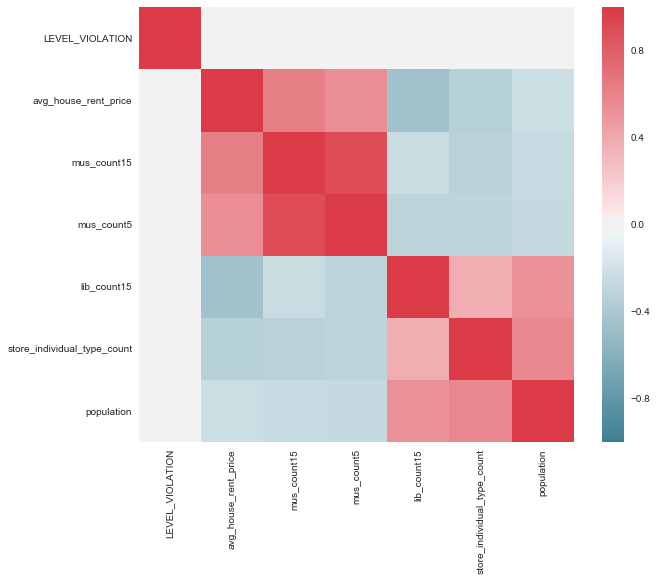

In [18]:
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns

corrmatrix_features = ['LEVEL_VIOLATION', 'avg_house_rent_price','mus_count15','mus_count5','lib_count15','store_individual_type_count','population']

f, ax = pl.subplots(figsize=(10, 8))
corr = rowData[corrmatrix_features].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

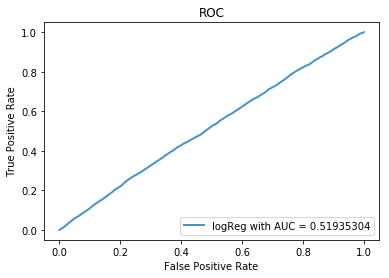

In [14]:

y_labels = ['LEVEL_FELONY', 'LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION','Y']
y_label = 'LEVEL_MISDEMEANOR'
# Classifier
logReg_cla = LogisticRegression(C=1e5)
prob_l = logReg_cla.fit(data_train.drop(y_labels, axis=1), data_train[y_label]).predict_proba(data_test.drop(y_labels, axis=1))
pred = prob_l[:,1]

fact = np.array(data_test[y_label].tolist())
fpr, tpr, thresholds = roc_curve(data_test[y_label], pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8,label='%s with AUC = %0.8f' % ('logReg', roc_auc))

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [15]:
np.sum((pred>=0.5) == fact)/len(pred)

0.55488007874129719

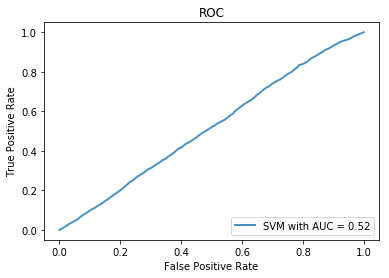

In [13]:
#SVM
svm_cla_prob = svm.SVC(kernel='linear', probability=True)
probas_ = svm_cla_prob.fit(data_train_svm.drop(y_labels, axis=1), data_train_svm[y_label]).predict_proba(data_test.drop(y_labels, axis=1))
pred = probas_[:, 1]
fpr, tpr, thresholds = roc_curve(data_test[y_label], pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=0.8,label='%s with AUC = %0.2f' % ('SVM', roc_auc))
    
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()